In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [2]:
path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)

In [3]:
df = df.iloc[:, [0, 2, 4]]

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

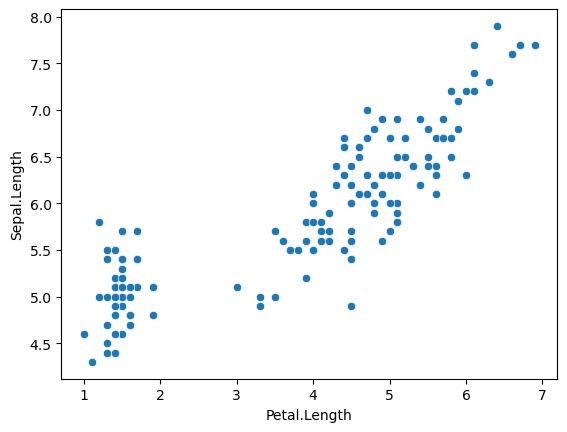

In [4]:
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length')

In [5]:
# Normalizando datos
X_std = StandardScaler().fit_transform(df.iloc[:, :-1])

# Gaussian Mixture

In [6]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
df['modelo Gaussiano'] = gm.predict(X_std)

mapeo = {2: 'setosa', 1: 'virginica', 0: 'versicolor'}
df['modelo Gaussiano'] = df['modelo Gaussiano'] .map(mapeo)
df

,Sepal.Length,Petal.Length,Species,modelo Gaussiano
0,5.1,1.4,setosa,setosa
1,4.9,1.4,setosa,setosa
2,4.7,1.3,setosa,setosa
3,4.6,1.5,setosa,setosa
4,5.0,1.4,setosa,setosa
...,...,...,...,...
145,6.7,5.2,virginica,virginica
146,6.3,5.0,virginica,versicolor
147,6.5,5.2,virginica,virginica
148,6.2,5.4,virginica,versicolor


# kmeans

In [8]:
kmeans = KMeans(n_clusters=3).fit(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
df['kmeans'] = kmeans.labels_

mapeo = {1: 'setosa', 2: 'versicolor', 0: 'virginica'}
df['kmeans'] = df['kmeans'].map(mapeo)

Text(792.3131313131312, 0.5, 'Real')

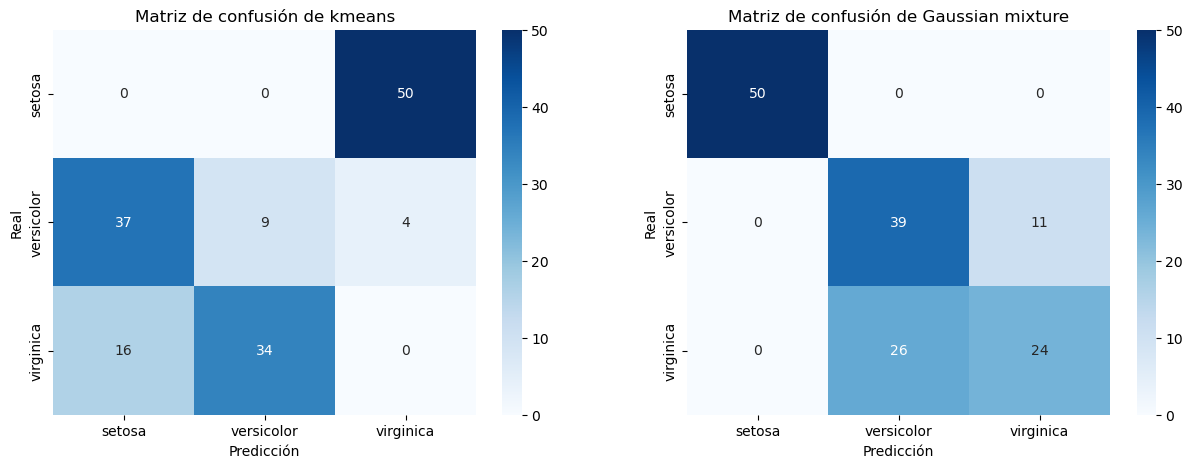

In [10]:
cm_gauss = confusion_matrix(df.Species, df['modelo Gaussiano'], labels=df.Species.unique())
cm_kmeans = confusion_matrix(df.Species, df.kmeans, labels=df.Species.unique())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[0]).set_title("Matriz de confusión de kmeans")

axes[0].set_xlabel('Predicción')
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[1]).set_title("Matriz de confusión de Gaussian mixture")

axes[1].set_xlabel('Predicción')
axes[1].set_ylabel("Real")

Text(0.5, 1.0, 'Método de Gaussian mixture')

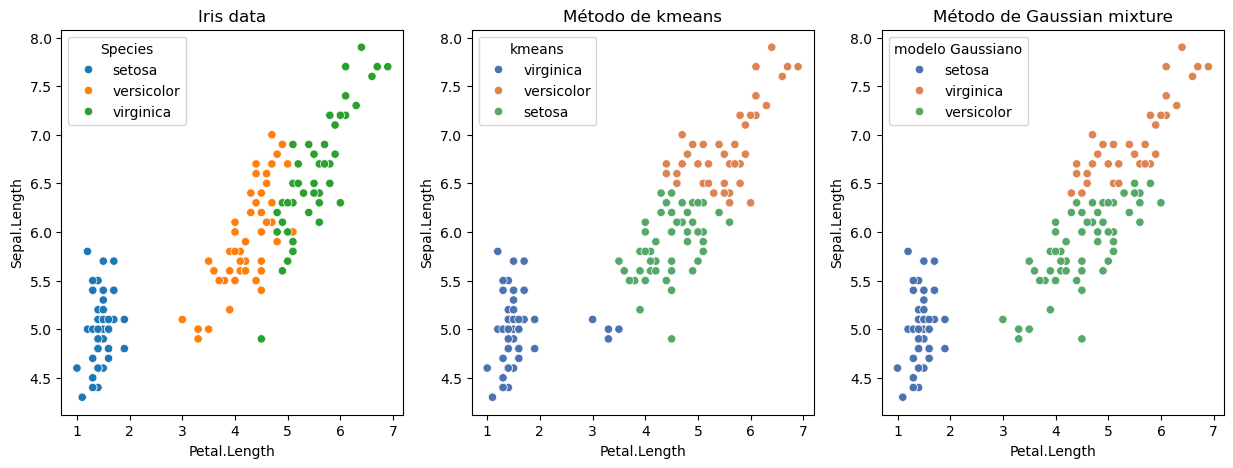

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='Species', ax=axes[0]).set_title('Iris data')

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='kmeans', palette='deep', ax=axes[1]).set_title('Método de kmeans')

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='modelo Gaussiano', palette='deep', ax=axes[2]).set_title('Método de Gaussian mixture')

In [37]:
from sklearn import datasets
import matplotlib.patches as mpatches

iris = datasets.load_iris()
x = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
X_std

array([[-0.90068117, -1.34022653],
       [-1.14301691, -1.34022653],
       [-1.38535265, -1.39706395],
       [-1.50652052, -1.2833891 ],
       [-1.02184904, -1.34022653],
       [-0.53717756, -1.16971425],
       [-1.50652052, -1.34022653],
       [-1.02184904, -1.2833891 ],
       [-1.74885626, -1.34022653],
       [-1.14301691, -1.2833891 ],
       [-0.53717756, -1.2833891 ],
       [-1.26418478, -1.22655167],
       [-1.26418478, -1.34022653],
       [-1.87002413, -1.51073881],
       [-0.05250608, -1.45390138],
       [-0.17367395, -1.2833891 ],
       [-0.53717756, -1.39706395],
       [-0.90068117, -1.34022653],
       [-0.17367395, -1.16971425],
       [-0.90068117, -1.2833891 ],
       [-0.53717756, -1.16971425],
       [-0.90068117, -1.2833891 ],
       [-1.50652052, -1.56757623],
       [-0.90068117, -1.16971425],
       [-1.26418478, -1.05603939],
       [-1.02184904, -1.22655167],
       [-1.02184904, -1.22655167],
       [-0.7795133 , -1.2833891 ],
       [-0.7795133 ,

In [40]:
df_std = pd.DataFrame(data=X_std, columns=df.columns[:2])

,Sepal.Length,Petal.Length,Species,modelo Gaussiano,kmeans,cluster_jerarquico
0,5.1,1.4,setosa,setosa,virginica,setosa
1,4.9,1.4,setosa,setosa,virginica,setosa
2,4.7,1.3,setosa,setosa,virginica,setosa
3,4.6,1.5,setosa,setosa,virginica,setosa
4,5.0,1.4,setosa,setosa,virginica,setosa
...,...,...,...,...,...,...
145,6.7,5.2,virginica,virginica,versicolor,virginica
146,6.3,5.0,virginica,versicolor,setosa,versicolor
147,6.5,5.2,virginica,virginica,versicolor,virginica
148,6.2,5.4,virginica,versicolor,setosa,virginica


In [42]:
clusters_centroids = {}
clusters_radii = {}

for cluster in list(set(y)):

    clusters_centroids[cluster]=list(zip(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster])) for i in zip(X_std[kmeans.labels_ == cluster, 0],X_std[kmeans.labels_ == cluster, 1])])


In [43]:
clusters_centroids, clusters_radii

({0: (-1.0151174923834787, -1.228656762681246),
  1: (0.03665518596439966, 0.41744409057338017),
  2: (1.2296190635487123, 1.0284401949860016)},
 {0: 1.082037140535442, 1: 1.1796798962465231, 2: 1.3481753321131995})

In [47]:
kmeans.cluster_centers_

array([[-1.01511749, -1.22865676],
       [ 0.03665519,  0.41744409],
       [ 1.22961906,  1.02844019]])

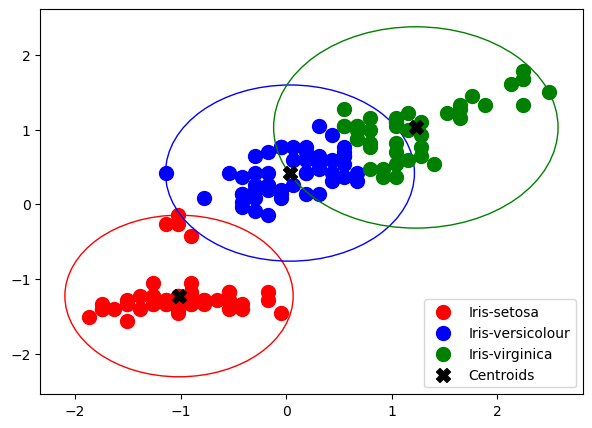

In [46]:
fig, ax = plt.subplots(1,figsize=(7,5))

plt.scatter(X_std[kmeans.labels_ == 0, 0], X_std[kmeans.labels_ == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
art = mpatches.Circle(clusters_centroids[0],clusters_radii[0], edgecolor='r',fill=False)
ax.add_patch(art)

plt.scatter(X_std[kmeans.labels_ == 1, 0], X_std[kmeans.labels_ == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
art = mpatches.Circle(clusters_centroids[1],clusters_radii[1], edgecolor='b',fill=False)
ax.add_patch(art)

plt.scatter(X_std[kmeans.labels_ == 2, 0], X_std[kmeans.labels_ == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
art = mpatches.Circle(clusters_centroids[2],clusters_radii[2], edgecolor='g',fill=False)
ax.add_patch(art)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, marker='X', c = 'k', label = 'Centroids')

plt.legend()

# Clustering jerárquico

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

[]

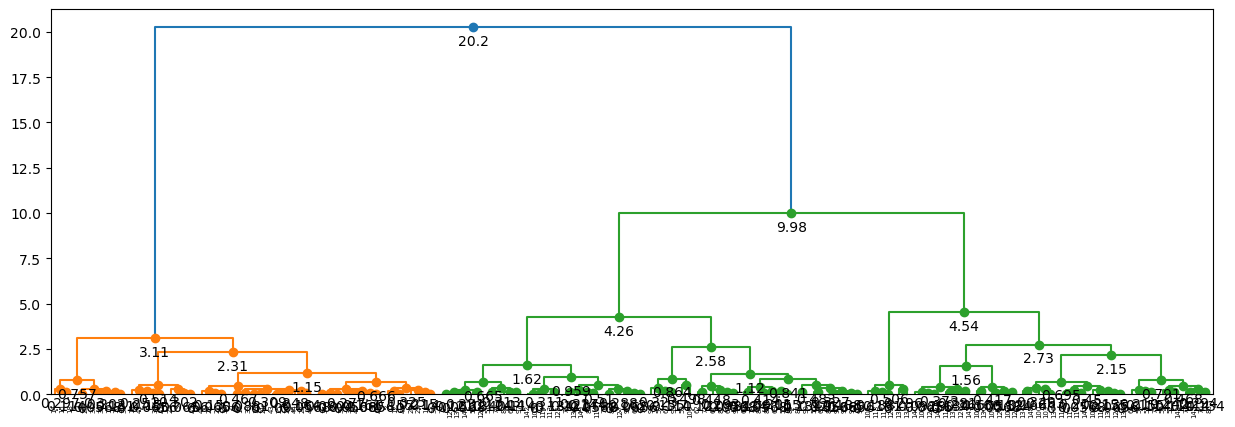

In [13]:
Z = linkage(X_std, 'ward')

plt.figure(figsize=(15, 5))
ddata = dendrogram(Z)
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    plt.plot(x,y,'o',c=c)
    plt.annotate('%.3g'%y, (x,y), xytext=(0,-5), 
                 textcoords="offset points", va="top", ha="center")

plt.plot()

In [14]:
clusters = fcluster(Z, t=9, criterion='distance')

df['cluster_jerarquico'] = clusters

mapeo = {1: 'setosa', 3: 'virginica', 2: 'versicolor'}
df['cluster_jerarquico'] = df['cluster_jerarquico'] .map(mapeo)

Text(0.5, 1.0, 'Cluster jerárquico')

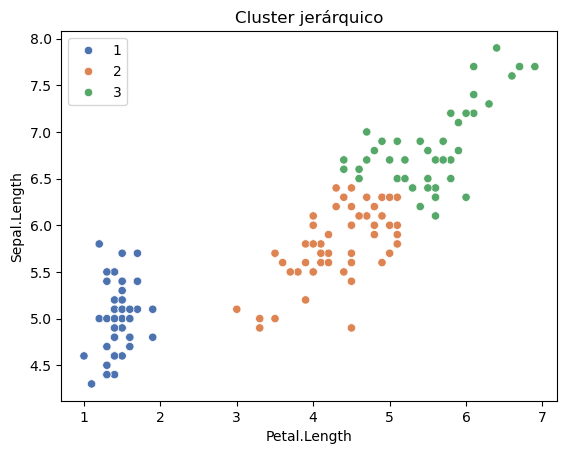

In [15]:
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters, palette='deep').set_title('Cluster jerárquico')

# Coparación de métodos

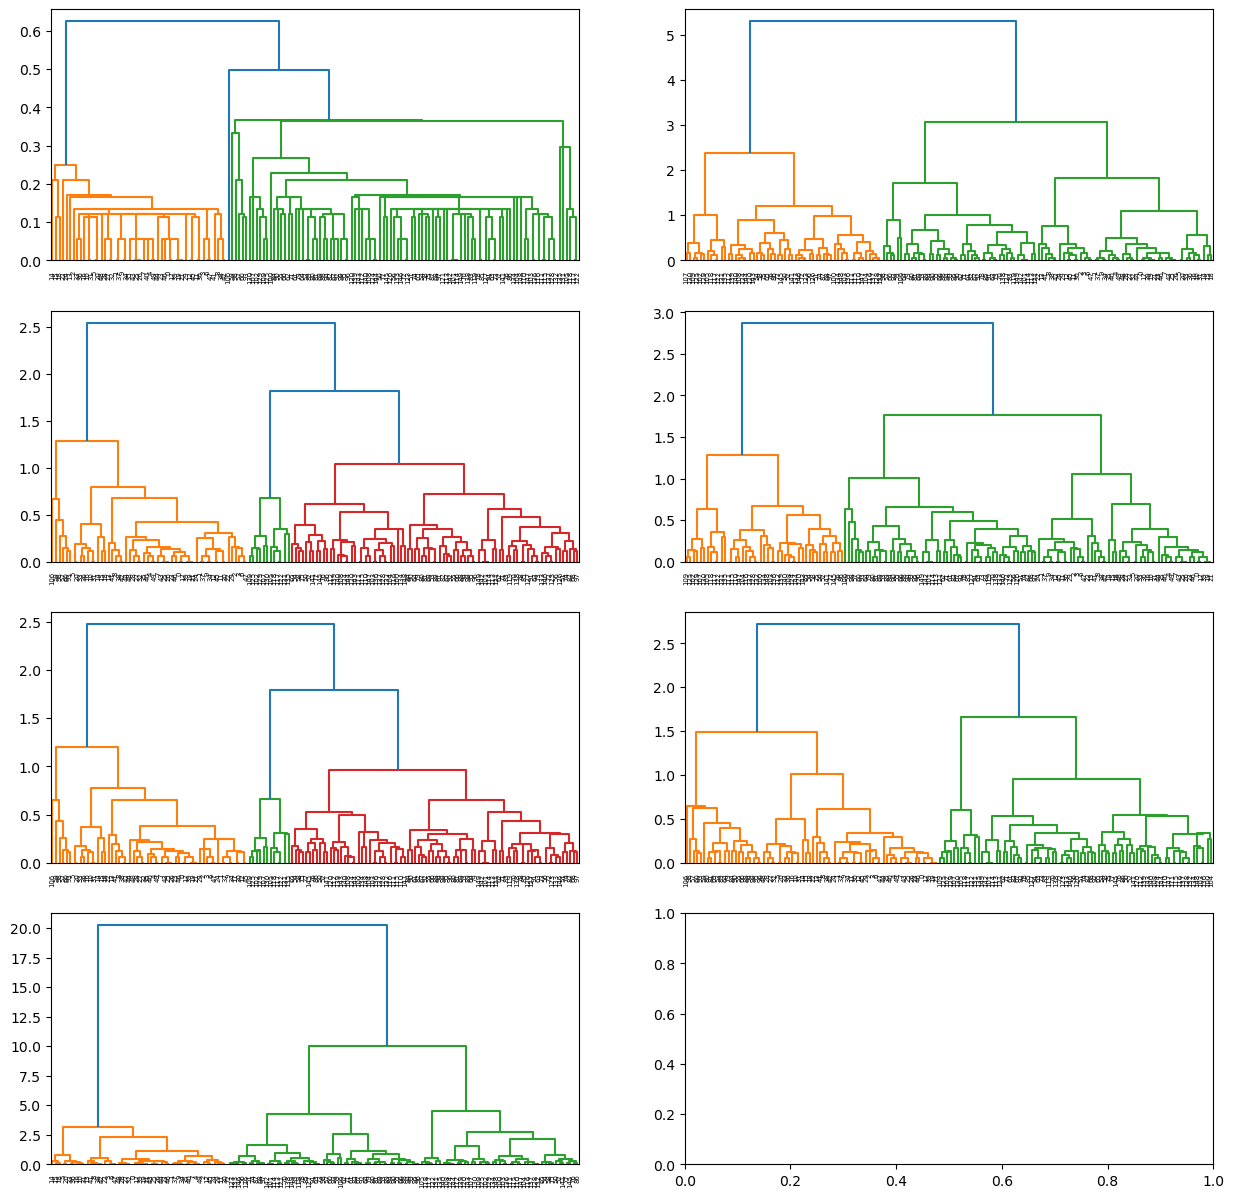

In [16]:
Z0 = linkage(X_std, 'single')
Z1 = linkage(X_std, 'complete')
Z2 = linkage(X_std, 'average')
Z3 = linkage(X_std, 'weighted')
Z4 = linkage(X_std, 'centroid')
Z5 = linkage(X_std, 'median')
Z6 = linkage(X_std, 'ward')

fig, axes = plt.subplots(4, 2, figsize=(15, 15))

dendrogram(Z0, ax=axes[0][0])
dendrogram(Z1, ax=axes[0][1])
dendrogram(Z2, ax=axes[1][0])
dendrogram(Z3, ax=axes[1][1])
dendrogram(Z4, ax=axes[2][0])
dendrogram(Z5, ax=axes[2][1])
dendrogram(Z6, ax=axes[3][0])

plt.show()

Text(0.5, 1.0, 'ward')

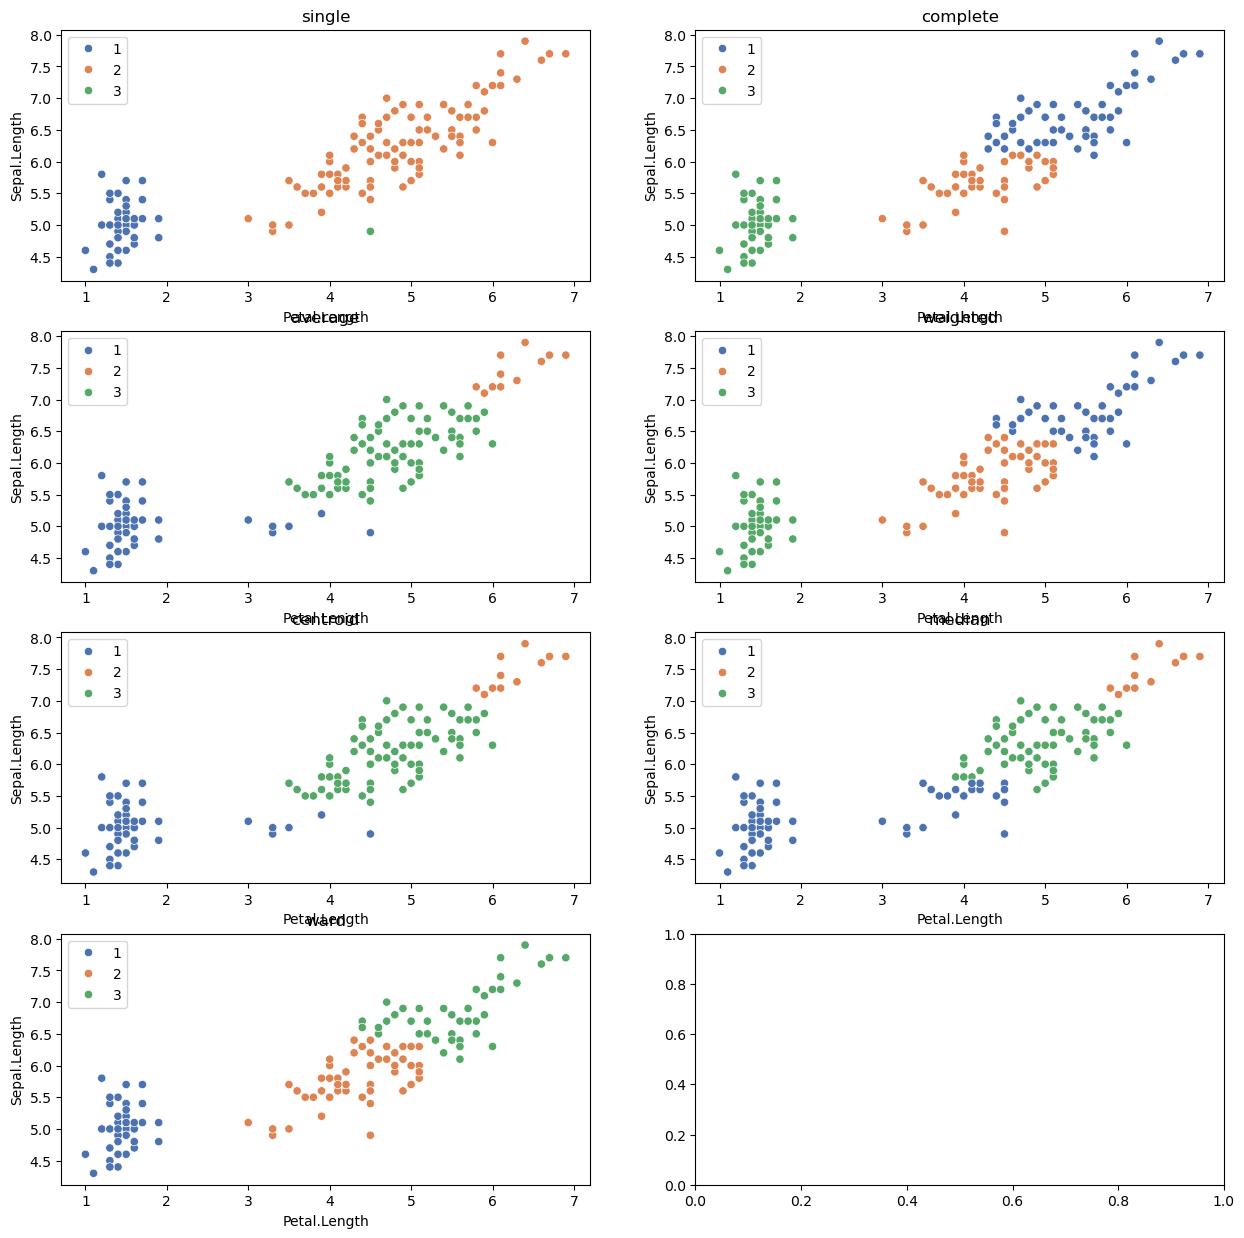

In [19]:
clusters0 = fcluster(Z0, t=0.4, criterion='distance')
clusters1 = fcluster(Z1, t=2.8, criterion='distance')
clusters2 = fcluster(Z2, t=1.5, criterion='distance')
clusters3 = fcluster(Z3, t=1.5, criterion='distance')
clusters4 = fcluster(Z4, t=1.5, criterion='distance')
clusters5 = fcluster(Z5, t=1.6, criterion='distance')
clusters6 = fcluster(Z6, t=7.5, criterion='distance')

fig, axes = plt.subplots(4, 2, figsize=(15, 15))

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters0, palette='deep', ax=axes[0][0]).set_title('single')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters1, palette='deep', ax=axes[0][1]).set_title('complete')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters2, palette='deep', ax=axes[1][0]).set_title('average')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters3, palette='deep', ax=axes[1][1]).set_title('weighted')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters4, palette='deep', ax=axes[2][0]).set_title('centroid')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters5, palette='deep', ax=axes[2][1]).set_title('median')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters6, palette='deep', ax=axes[3][0]).set_title('ward')

# Coparación de modelos

Text(978.81045751634, 0.5, 'Real')

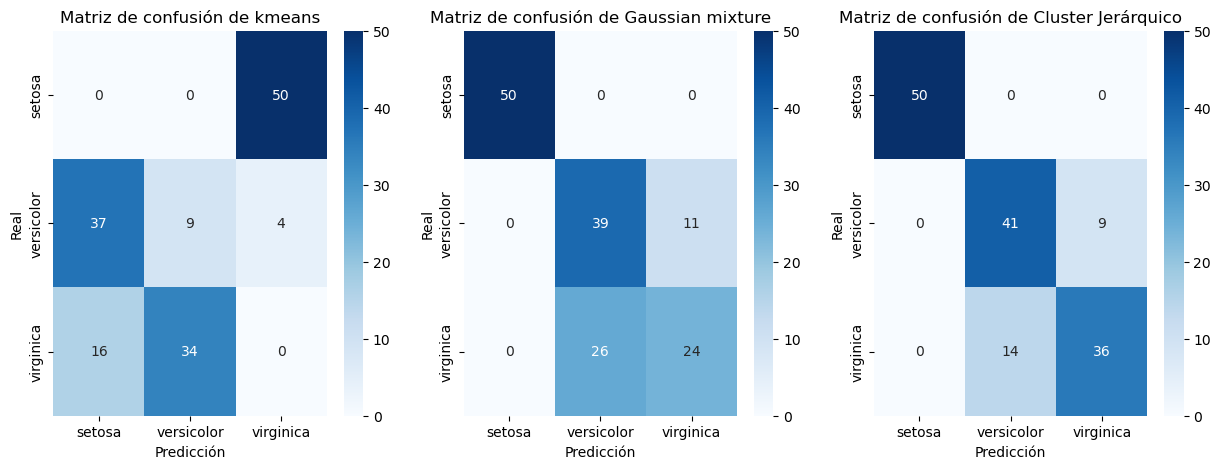

In [20]:
cm_jerarquic = confusion_matrix(df.Species, df.cluster_jerarquico, labels=df.Species.unique())

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[0]).set_title("Matriz de confusión de kmeans")

axes[0].set_xlabel('Predicción')
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[1]).set_title("Matriz de confusión de Gaussian mixture")

axes[1].set_xlabel('Predicción')
axes[1].set_ylabel("Real")

sns.heatmap(cm_jerarquic, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[2]).set_title("Matriz de confusión de Cluster Jerárquico")

axes[2].set_xlabel('Predicción')
axes[2].set_ylabel("Real")